In [1]:
import os
import numpy as np
import glob
import shutil
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_dir ='/content/drive/MyDrive/Face/train'
val_dir = '/content/drive/MyDrive/Face/val'

In [20]:
batch_size = 120
IMG_SHAPE = 150 
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
train_data_gen = image_gen.flow_from_directory(
                                                batch_size=batch_size,
                                                directory=train_dir,
                                                shuffle=True,
                                                target_size=(IMG_SHAPE,IMG_SHAPE)
                                                )

Found 70 images belonging to 3 classes.


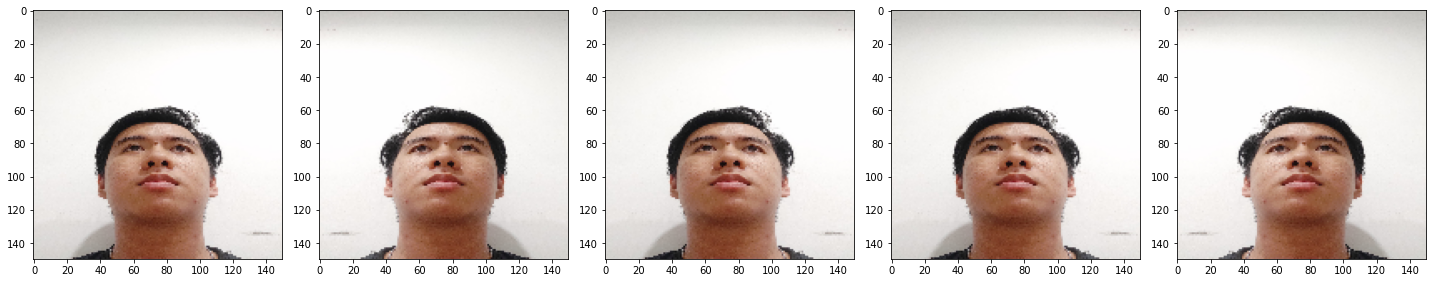

In [21]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [22]:
image_gen_val = ImageDataGenerator(rescale=1./255)
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)
train_data_gen = image_gen.flow_from_directory(
                                                batch_size=batch_size,
                                                directory=train_dir,
                                                shuffle=True,
                                                target_size=(IMG_SHAPE,IMG_SHAPE)
                                                )

Found 70 images belonging to 3 classes.


In [23]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )

In [24]:
image_gen_val = ImageDataGenerator(rescale=1./255)
train_data_gen = image_gen_train.flow_from_directory(
                                                batch_size=batch_size,
                                                directory=train_dir,
                                                shuffle=True,
                                                target_size=(IMG_SHAPE,IMG_SHAPE),
                                                class_mode='sparse'
                                                )

Found 70 images belonging to 3 classes.


In [25]:
model = Sequential()
model.add(Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_SHAPE,IMG_SHAPE, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5))

In [26]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [28]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(train_data_gen.n / float(batch_size))),
    epochs=30,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(val_data_gen.n / float(batch_size)))
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/30
1/1 [==============================] - 6s 6s/step - loss: 1.3593 - accuracy: 0.7000 - val_loss: 0.8073 - val_accuracy: 0.8305
Epoch 2/30
1/1 [==============================] - 6s 6s/step - loss: 0.9023 - accuracy: 0.6000 - val_loss: 1.0078 - val_accuracy: 0.8475
Epoch 3/30
1/1 [==============================] - 6s 6s/step - loss: 1.0304 - accuracy: 0.4857 - val_loss: 0.7777 - val_accuracy: 0.8305
Epoch 4/30
1/1 [==============================] - 6s 6s/step - loss: 0.8993 - accuracy: 0.6857 - val_loss: 0.5894 - val_accuracy: 0.8305
Epoch 5/30
1/1 [==============================] - 6s 6s/step - loss: 0.7580 - accuracy: 0.7000 - val_loss: 0.5156 - val_accuracy: 0.8305
Epoch 6/30
1/1 [==============================] - 6s 6s/step - loss: 0.7339 - accuracy: 0.7000 - val_loss: 0.4978 - val_accuracy: 0.8305
Epoch 7/30
1/1 [==============================] - 6s 6s/step - loss: 0.7253 - accuracy: 0.7000 - val_loss: 0.4905 - val_accuracy: 0.8305
Epoch 8/30
1/1 [=========================

In [29]:
model.save('final_face.h5')

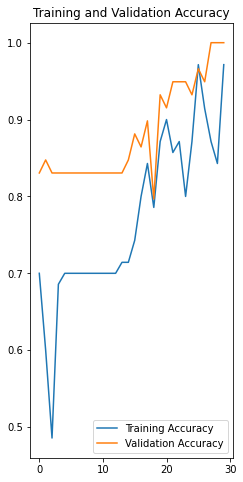

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(30)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

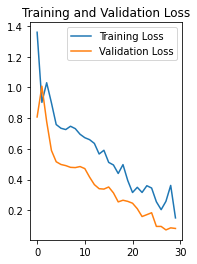

In [33]:
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img,save_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img

Loc
1


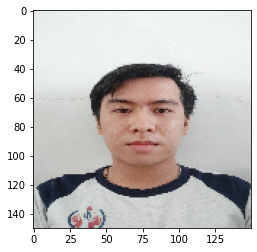

In [35]:
img = load_img('/content/loc.jpg',target_size=(IMG_SHAPE,IMG_SHAPE,3))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,IMG_SHAPE,IMG_SHAPE,3)
img = img.astype('float64')
a=np.argmax(model.predict(img),axis = 1)
if a.any() == 1: 
  print('Loc')
  print('1')
else: 
  print('0')
  print('khong phai Loc')